>> #   **PRCP-1000-PortugeseBank**

##  Problem Statement

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.

## 2. Objective
- The Objective is to predict whether a customer will subscribe to term deposit(y)

## Task -1 Complete Data Analysis Reprot

### 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Data Collection and Analysis

#### 2.1. Data collect

In [3]:
df = pd.read_csv(r"C:\Users\DELL 5410\Downloads\PRCP-1000-ProtugeseBank\Data\bank-additional\bank-additional-full.csv",sep=';')

#### 2.2. Understand Data

In [4]:
print(df.shape)

(41188, 21)


In [5]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


#### 2.3 Identifing Numeric and Categoric columns

In [6]:
num_col = []
cat_col = []
for col in df.columns:
    if (df[col].dtypes) == 'object' :
        cat_col.append(col)
    else:
        num_col.append(col)

In [7]:
print(num_col)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [8]:
print(cat_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [9]:
df['age'].dtypes

dtype('int64')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Insights
- The dataset contains 41188 observations and 21 features.
- The dataset includes demographic information, financial and loan-related attributes, campaign interaction history, and macroeconomic indicators that influence customer investment behavior.  

#### 2.4 Check duplicate and null values

In [11]:
# check null values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [12]:
#check duplicate values
print(df.duplicated().sum())

12


#### Insights 
- Dataset contain duplicate values, so we will drop them.
- Dataset does not cantain any missing values.
- However several categorical varibles include 'unknown', which is treated as valid category.

#### 2.5. Target Variable Analysis

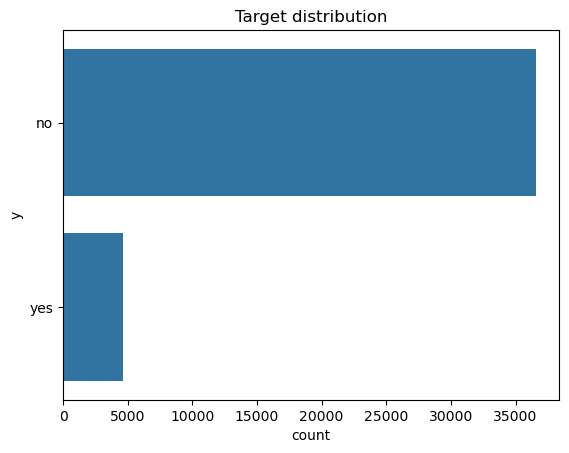

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [13]:
sns.countplot(df['y'])
plt.title('Target distribution')
plt.savefig("Outputs/Target_variable_analysis.png")
plt.show()
df['y'].value_counts(normalize=True)

#### Insights
- Dataset is highly imbalanced
- ~89% no and ~11% yes

## 3. Exploaratory Data Analysis

### 3.1. Age VS Subbscription

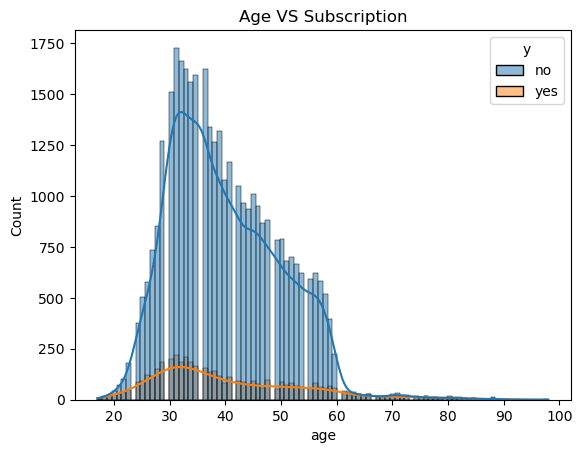

In [11]:
sns.histplot(x=df.age,hue=df.y, kde=True)
plt.title('Age VS Subscription')
plt.show()

#### Insights 
- The 30-40 age group shows more subscription rate compared to other age groups.
- Younger age group who are below age 25 shows lower subscription rate, possible reason could be lower income, less financial commitments.
- Older age group who are above age 60 also shows lower subsciription rate, This may due to retiremnt and less need for long-term financial needs.
#### Business Insights
- The 30-40 age group represent high potential target segment for marketing compaigns.
- Targeted offer and personalized messaging could imporve conversion rate in this segment

### 3.2 Job VS Subscription

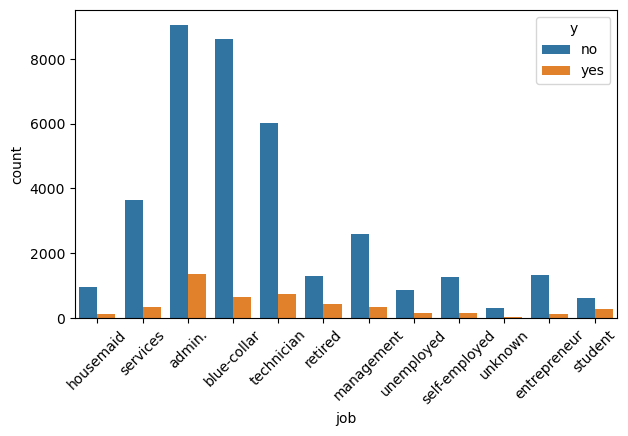

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(x=df.job,hue=df.y)
plt.xticks(rotation=45)
plt.show()

#### Insghts
- People who are in the job **admin, blue-collar, technician** have higher subscription rate compared to other job holders
- **Student** population is small but it shows some positive responses.
- **Retired** customers show a moderate subscription level, possibly due to interest in low-risk financial products.
- Housemaid, unemployed, self-employed, and unknown categories show very low subscription counts.
#### Business Insights
- Customers working in **Admin, Techician** roles are more likely to subscribe, making them ideal targets for marketing compaign.
- **Blue-collar** customers, high in number, show lower conversation and may need persolized offers.
- Low response groups(housemaid, unempoyed, unkown) shoulb targeted selectively to reduce the compaign costs.
- Focusing on High potential segments can improve compaign efficiancy and reduce costs.

### 3.3 Previous compaign outcome

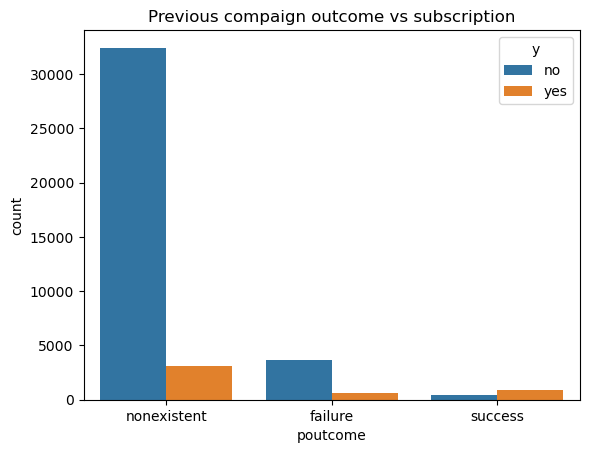

In [13]:
sns.countplot(x = df.poutcome, hue=df.y)
plt.title('Previous compaign outcome vs subscription')
plt.show()

#### Observation
- Customers with a successful outcome in previous campaigns have a much higher likelihood of subscribing again. Customers with no previous contact form the majority but show a lower subscription rate, while customers with previous failures are least likely to subscribe.
#### Business insights
- Previous campaign success is a strong indicator of customer interest and can be used to prioritize customers in future marketing campaigns.

### 3.4 Correlation

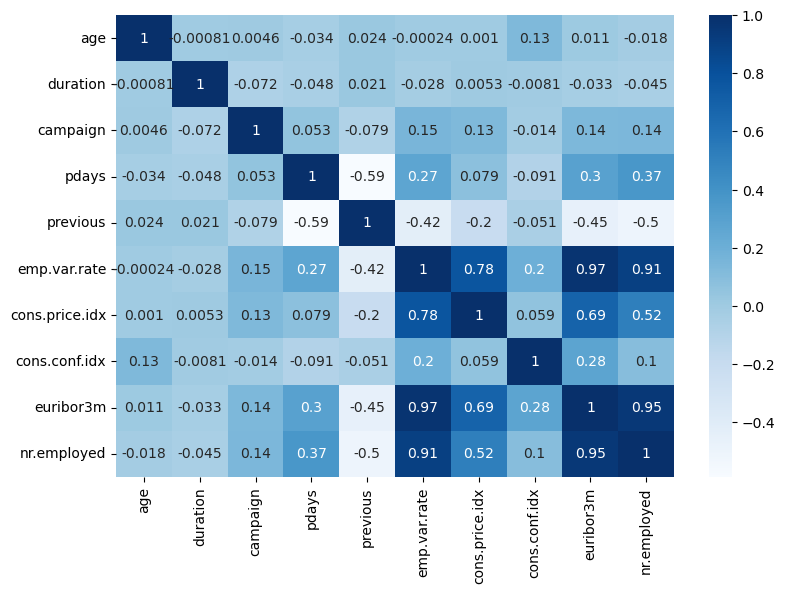

In [19]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)
plt.show()

#### Observation
- Strong positive correlations are observed among economic variables such as emp.var.rate, euribor3m, and nr.employed, indicating they move together. Most customer-related features like age, campaign count, and previous contacts show weak correlation with each other.
#### Insights
- The presence of high correlation among economic indicators suggests potential multicollinearity, which should be considered when using linear models, while tree-based models can handle this effectively.

### 4. Data Preprocessing

#### 4.1 Handle Duplicate Columns

In [20]:
# since we have 12 duplicated values so we will drop them
df.drop_duplicates(inplace=True)

#### 4.2 Feature Engineering